In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [56]:
# Fields_Summary
Fields_Summary = pd.read_excel(r'C:\Users\himanshu.singhal\Downloads\Himanshu_singhal\data.xlsx', sheet_name = 0)

# Cars Data
data = pd.read_excel(r'C:\Users\himanshu.singhal\Downloads\Himanshu_singhal\data.xlsx', sheet_name = 1)

In [57]:
Fields_Summary.head()

,Columns,Description,Variable
0,appointmentId,Unique id,Independent
1,inspectionStartTime,inspection date,Independent
2,year,registration year,Independent
3,month,registration month,Independent
4,engineTransmission_battery_value,condition ok: yes\nelse : no,Independent


In [58]:
data.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,93348,3.5
3,aj_04,2019-01-18 11:02:53,2013,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,48233,3.5
4,aj_05,2019-01-27 12:12:06,2011,7,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,74368,4.0


### Set hypothesis

- lest say hypothesis
- From the Fields_Summary, it seems that null values have to be imputed as "yes" in most of columns.

In [59]:
# Checking the above hypothesis
# Extracting the variables having more than 40% null values
null_values  = data.columns[data.isnull().sum() * 100 / data.shape[0] > 40]
print("Total number of columns which has more than 40% null values in it: {}".format(len(null_values)))

set_A = set(Fields_Summary[Fields_Summary['Description'] == "current condition if not yes"]['Columns'])
set_B = set(null_values)

# Performing an intersection of both the sets
set_A.intersection(set_B)

Total number of columns which has more than 40% null values in it: 52


{'engineTransmission_battery_cc_value_0',
 'engineTransmission_battery_cc_value_1',
 'engineTransmission_battery_cc_value_2',
 'engineTransmission_battery_cc_value_3',
 'engineTransmission_battery_cc_value_4',
 'engineTransmission_clutch_cc_value_0',
 'engineTransmission_clutch_cc_value_1',
 'engineTransmission_clutch_cc_value_2',
 'engineTransmission_clutch_cc_value_3',
 'engineTransmission_clutch_cc_value_4',
 'engineTransmission_clutch_cc_value_5',
 'engineTransmission_clutch_cc_value_6',
 'engineTransmission_coolant_cc_value_0',
 'engineTransmission_coolant_cc_value_1',
 'engineTransmission_coolant_cc_value_2',
 'engineTransmission_coolant_cc_value_3',
 'engineTransmission_engineMounting_cc_value_0',
 'engineTransmission_engineOilLevelDipstick_cc_value_0',
 'engineTransmission_engineOil_cc_value_1',
 'engineTransmission_engineOil_cc_value_2',
 'engineTransmission_engineOil_cc_value_3',
 'engineTransmission_engineOil_cc_value_4',
 'engineTransmission_engineOil_cc_value_5',
 'engineT

In [60]:
len(set_A.intersection(set_B))

47

- 47 out of 53 variables have a description of "current condition if not yes"
- hance we can conclude that our hypothesis is true, out of 52 columns 47 column has yes as defult value so we fill the null value of all 47 columns as yes.
- lest check other 4 columes those has null value but condtion is other then current "condition if not yes"

In [61]:
# Check for rest of the null variables
var_null = [var for var in null_values if var not in list(set_A.intersection(set_B))]
null_V = data[var_null]
null_V

,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4
0,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
26302,Electrical wiring Damaged,NaN,NaN,NaN,NaN
26303,NaN,NaN,NaN,NaN,NaN
26304,NaN,NaN,NaN,NaN,NaN
26305,NaN,NaN,NaN,NaN,NaN


In [62]:
print(" * Out of 26307 row this many of percentage of null values are there in : ")
print(null_V.isnull().sum() *100 / 26307)

 * Out of 26307 row this many of percentage of null values are there in : 
engineTransmission_comments_value_0    84.544038
engineTransmission_comments_value_1    95.027939
engineTransmission_comments_value_2    98.517505
engineTransmission_comments_value_3    99.775725
engineTransmission_comments_value_4    99.946782
dtype: float64


- As we can analyze that in above columns has more the 80% of null values and they are also not under condition of 40% more null values in it.
- we have 2 options over here
   1. drop those colums
   2. We can impute "no" in above columns as mentioned in Fields_Summary

- it is better to drop those colums as they are not important as per above analysis
- Now we can impute "yes" in null values as per Fields_Summary  

# Missing Value and outlier treatment

In [63]:
import pandas as pd
import numpy as np

def percentage_missing(df):
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
    result_df = pd.DataFrame({'Column': missing_percentage_sorted.index, 
                              'Percentage Missing': missing_percentage_sorted.values})
    
    return result_df

def identify_outliers(df, threshold=3):
    outliers = pd.DataFrame()
    for column in df.columns:
        if df[column].dtype != 'object':
            z_scores = (df[column] - df[column].mean()) / df[column].std()
            outliers[column] = df.index[abs(z_scores) > threshold].tolist()
    return outliers



In [64]:

missing_percentage = percentage_missing(data)
print("Percentage of Missing Values:")
print(missing_percentage.head(50))


Percentage of Missing Values:
                                               Column  Percentage Missing
0             engineTransmission_engineOil_cc_value_9          100.000000
1               engineTransmission_engine_cc_value_10          100.000000
2                engineTransmission_clutch_cc_value_6           99.996199
3             engineTransmission_engineOil_cc_value_8           99.992397
4                engineTransmission_engine_cc_value_9           99.988596
5               engineTransmission_battery_cc_value_4           99.984795
6                engineTransmission_engine_cc_value_8           99.984795
7                engineTransmission_clutch_cc_value_5           99.973391
8               engineTransmission_coolant_cc_value_3           99.969590
9                engineTransmission_engine_cc_value_7           99.969590
10            engineTransmission_engineOil_cc_value_7           99.958186
11                engineTransmission_comments_value_4           99.946782
12      

In [65]:
def identify_outliers(df, method='iqr', threshold=1.5):
    outlier_cols = []
    for col in df.columns:
        if method == 'iqr':
            if df[col].dtype != 'object':
                q1 = df[col].quantile(0.25)
                q3 = df[col].quantile(0.75)
                iqr = q3 - q1
                lower_bound = q1 - threshold * iqr
                upper_bound = q3 + threshold * iqr
                outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
                if len(outliers) > 0:
                    outlier_cols.append(col)
        elif method == 'z-score':
            if df[col].dtype != 'object':
                z_scores = (df[col] - df[col].mean()) / df[col].std()
                outliers = df.index[abs(z_scores) > threshold].tolist()
                if len(outliers) > 0:
                    outlier_cols.append(col)
    return outlier_cols



In [66]:
# checking with both the outliers methods
outliers = identify_outliers(df=data, method="z-score")
print("\nOutliers:")
print(outliers)


Outliers:
['inspectionStartTime', 'year', 'month', 'odometer_reading', 'rating_engineTransmission']


<Axes: ylabel='year'>

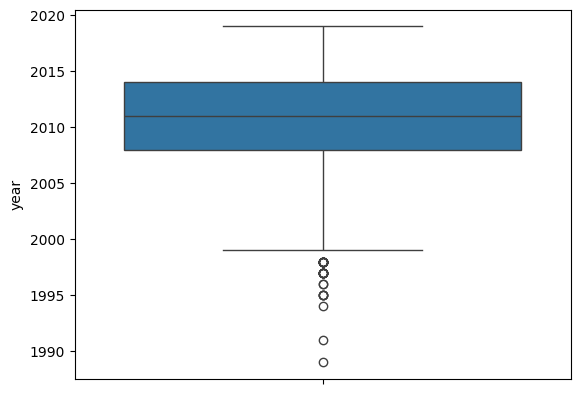

In [67]:
sns.boxplot(data['year'])

<Axes: ylabel='month'>

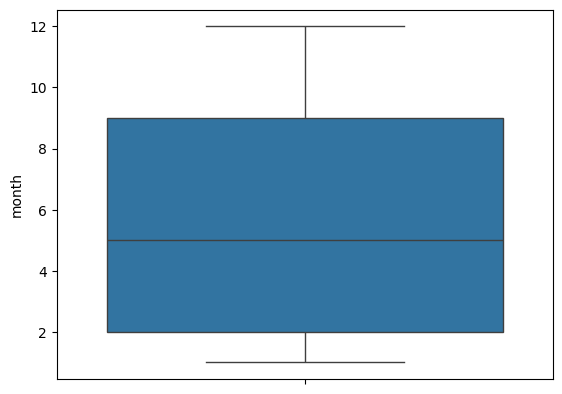

In [68]:
sns.boxplot(data['month'])

<Axes: ylabel='odometer_reading'>

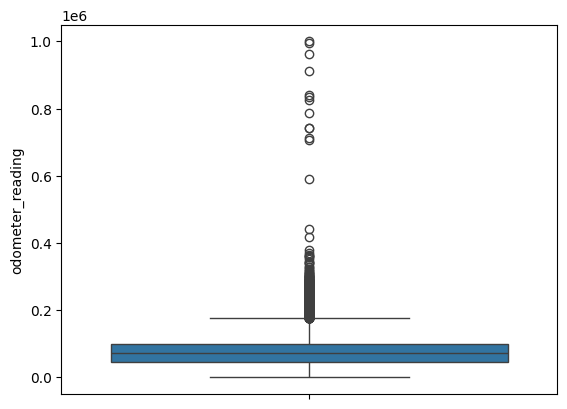

In [69]:
sns.boxplot(data['odometer_reading'])

<Axes: ylabel='rating_engineTransmission'>

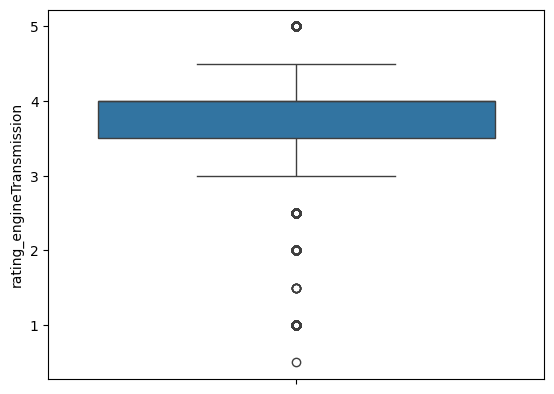

In [70]:
sns.boxplot(data['rating_engineTransmission'])

<Axes: ylabel='inspectionStartTime'>

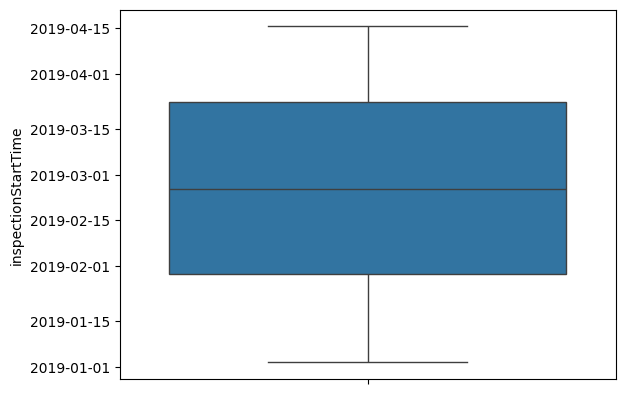

In [71]:
sns.boxplot(data['inspectionStartTime'])

In [72]:
def remove_high_missing_columns(df, threshold):
    missing_percentage = (df.isnull().sum() / len(df))
    high_missing_columns = missing_percentage[missing_percentage >= threshold].index.tolist()
    df_filtered = df.drop(columns=high_missing_columns)
    
    return df_filtered

def outlier_treatment(df, lower_quantile=0.01, upper_quantile=0.99):
    lower_quantile = min(max(lower_quantile, 0), 1)
    upper_quantile = min(max(upper_quantile, 0), 1)
    numeric_columns = df.select_dtypes(include=['number'])
    lower_bound = numeric_columns.quantile(lower_quantile)
    upper_bound = numeric_columns.quantile(upper_quantile)

    df_treated = df.copy()  
    for col in numeric_columns:
        df_treated[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])
    
    return df_treated



In [73]:
df_1=remove_high_missing_columns(data, threshold=0.90)
df_2=outlier_treatment(df_1)
data.shape, df_1.shape

((26307, 73), (26307, 36))

# EDA

In [74]:
df_2 = df_2.fillna('yes') # imputing as proved above
df_2.replace("Yes",1, inplace = True) # Replacing "Yes" with 1.
df_2.replace("No",0, inplace = True) # Replacing "No" with 0.

In [75]:
categorical_data = df_2.select_dtypes(include=['object']).columns
vriable_data = [cols for cols in df_2.columns if cols not in categorical_data]
print("Total Categorcal data in DB : ",len(categorical_data))
print("total vraible data :",len(vriable_data))

Total Categorcal data in DB :  20
total vraible data : 16


In [76]:
list(categorical_data)

['appointmentId',
 'engineTransmission_battery_cc_value_0',
 'engineTransmission_engineOil_cc_value_0',
 'engineTransmission_engineOil_cc_value_1',
 'engineTransmission_engineOil_cc_value_2',
 'engineTransmission_engineOil_cc_value_3',
 'engineTransmission_engine_cc_value_0',
 'engineTransmission_engine_cc_value_1',
 'engineTransmission_coolant_cc_value_0',
 'engineTransmission_engineMounting_cc_value_0',
 'engineTransmission_engineSound_cc_value_0',
 'engineTransmission_engineSound_cc_value_1',
 'engineTransmission_engineSound_cc_value_2',
 'engineTransmission_exhaustSmoke_cc_value_0',
 'engineTransmission_engineBlowByBackCompression_cc_value_0',
 'engineTransmission_clutch_cc_value_0',
 'engineTransmission_clutch_cc_value_1',
 'engineTransmission_gearShifting_cc_value_0',
 'engineTransmission_comments_value_0',
 'fuel_type']

In [77]:
list(vriable_data)

['inspectionStartTime',
 'year',
 'month',
 'engineTransmission_battery_value',
 'engineTransmission_engineoilLevelDipstick_value',
 'engineTransmission_engineOil',
 'engineTransmission_engine_value',
 'engineTransmission_coolant_value',
 'engineTransmission_engineMounting_value',
 'engineTransmission_engineSound_value',
 'engineTransmission_exhaustSmoke_value',
 'engineTransmission_engineBlowByBackCompression_value',
 'engineTransmission_clutch_value',
 'engineTransmission_gearShifting_value',
 'odometer_reading',
 'rating_engineTransmission']

In [78]:
df_2["engineTransmission_battery_cc_value_0"].value_counts()

yes                          22869
Weak                          3097
Changed                        227
Jump Start                      55
Not Working                     39
Discharging light glowing       20
Name: engineTransmission_battery_cc_value_0, dtype: int64

In [79]:
df_2["engineTransmission_engineOil_cc_value_0"].value_counts()

Leaking                               7892
yes                                   7750
Dirty                                 6906
Level Low                             2739
Leakage from Tappet Cover              716
Leakage from Side cover                221
Leakage from Sump/chamber               50
Leakage from Turbo Charger              31
Low Pressure warning light glowing       1
Mixed with Coolant                       1
Name: engineTransmission_engineOil_cc_value_0, dtype: int64

In [80]:
df_2["engineTransmission_engineOil_cc_value_1"].value_counts()

yes                                   15303
Dirty                                  5589
Leakage from Tappet Cover              2148
Leaking                                2087
Leakage from Side cover                 800
Leakage from Sump/chamber               240
Leakage from Turbo Charger              117
Low Pressure warning light glowing       12
Mixed with Coolant                       11
Name: engineTransmission_engineOil_cc_value_1, dtype: int64

In [81]:
df_2["engineTransmission_engineOil_cc_value_2"].value_counts()

yes                                   19714
Leakage from Tappet Cover              2908
Dirty                                  1598
Leakage from Side cover                1433
Leakage from Sump/chamber               472
Leakage from Turbo Charger              158
Low Pressure warning light glowing       13
Mixed with Coolant                       11
Name: engineTransmission_engineOil_cc_value_2, dtype: int64

In [82]:
df_2["engineTransmission_engineOil_cc_value_3"].value_counts()

yes                                   22565
Leakage from Side cover                1908
Leakage from Tappet Cover              1083
Leakage from Sump/chamber               572
Leakage from Turbo Charger              160
Low Pressure warning light glowing       11
Mixed with Coolant                        8
Name: engineTransmission_engineOil_cc_value_3, dtype: int64

In [83]:
df_2["engineTransmission_engine_cc_value_0"].value_counts()

yes                           17237
RPM fluctuating                3409
Repaired                       2376
Misfiring                      1613
MIL light glowing               915
RPM not increasing              266
Fuel Leakage From Injector      220
Over heating                    129
Sump Damaged                     64
Not converting to CNG            50
Turbo charger not working        13
Car not working on Petrol        11
Seized                            4
Name: engineTransmission_engine_cc_value_0, dtype: int64

In [84]:
df_2["engineTransmission_engine_cc_value_1"].value_counts()

yes                           21223
Misfiring                      2228
Repaired                       1426
MIL light glowing               743
Over heating                    202
Fuel Leakage From Injector      167
RPM fluctuating                 163
Not converting to CNG            59
Sump Damaged                     56
Turbo charger not working        20
Car not working on Petrol        17
Seized                            3
Name: engineTransmission_engine_cc_value_1, dtype: int64

In [85]:
df_2["engineTransmission_coolant_cc_value_0"].value_counts()

yes                      16271
Dirty                     6920
Leaking                   3061
Radiator Damaged            37
Mixed with Engine Oil       18
Name: engineTransmission_coolant_cc_value_0, dtype: int64

In [86]:
feature_columns=list(set(categorical_data)-{'appointmentId'})
for column in feature_columns:
    print(f"Value counts for {column}:")
    print(df_2[column].value_counts())
    print("\n")

Value counts for engineTransmission_engineMounting_cc_value_0:
yes                 17020
Excess Vibration     7437
Broken               1224
Loose                 626
Name: engineTransmission_engineMounting_cc_value_0, dtype: int64


Value counts for engineTransmission_engineBlowByBackCompression_cc_value_0:
NO Blow-by                              21737
Perm. Blow By on idle                    2043
Back Compression Exist                   1546
Oil spillage on Idle                      539
Perm. blow by & oil spillage on idle      442
Name: engineTransmission_engineBlowByBackCompression_cc_value_0, dtype: int64


Value counts for engineTransmission_engineOil_cc_value_1:
yes                                   15303
Dirty                                  5589
Leakage from Tappet Cover              2148
Leaking                                2087
Leakage from Side cover                 800
Leakage from Sump/chamber               240
Leakage from Turbo Charger              117
Low Pressure w

In [87]:
freq_encoding_list=['engineTransmission_engineOil_cc_value_2','engineTransmission_engine_cc_value_1','engineTransmission_engine_cc_value_0',
                    'engineTransmission_engineSound_cc_value_1','engineTransmission_clutch_cc_value_0','engineTransmission_clutch_cc_value_1',
                    'engineTransmission_engineBlowByBackCompression_cc_value_0','engineTransmission_engineSound_cc_value_0','engineTransmission_exhaustSmoke_cc_value_0',
                    'engineTransmission_comments_value_0','engineTransmission_engineOil_cc_value_0','engineTransmission_engineOil_cc_value_3',
                    'engineTransmission_engineOil_cc_value_1']
label_encoding_list=['engineTransmission_engineSound_cc_value_2','engineTransmission_coolant_cc_value_0','engineTransmission_battery_cc_value_0',
                     'engineTransmission_gearShifting_cc_value_0','engineTransmission_engineMounting_cc_value_0','fuel_type']

### Categorical Encoding

In [88]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in label_encoding_list:
    df_2[f'{i}'] = label_encoder.fit_transform(df_2[f'{i}'])

for j in freq_encoding_list:
    freq_encoding = df_2[f'{j}'].value_counts(normalize=True)
    df_2[f'{j}'] = df_2[f'{j}'].map(freq_encoding)

In [89]:
# Extract the inspection month, day & hour
inspection_Date = df_2['inspectionStartTime'].dt.date
inspection_Month = df_2['inspectionStartTime'].dt.month
inspection_WeekDay = df_2['inspectionStartTime'].dt.dayofweek
inspection_Day = df_2['inspectionStartTime'].dt.day
inspection_Hour = df_2['inspectionStartTime'].dt.hour

# Insert into the dataframe
df_2.insert(2,'inspection_Date', inspection_Date)
df_2.insert(3,'inspection_Month', inspection_Month)
df_2.insert(4,'inspection_Day', inspection_Day)
df_2.insert(5,'inspection_WeekDay', inspection_WeekDay)
df_2.insert(6,'inspection_Hour', inspection_Hour)

In [90]:
df_2.dtypes

appointmentId                                                        object
inspectionStartTime                                          datetime64[ns]
inspection_Date                                                      object
inspection_Month                                                      int64
inspection_Day                                                        int64
inspection_WeekDay                                                    int64
inspection_Hour                                                       int64
year                                                                  int64
month                                                                 int64
engineTransmission_battery_value                                      int64
engineTransmission_battery_cc_value_0                                 int32
engineTransmission_engineoilLevelDipstick_value                       int64
engineTransmission_engineOil                                          int64
engineTransm

### Correlation

In [91]:
variables_to_correlate = df_2.drop(columns=['appointmentId','inspectionStartTime','inspection_Date'])
correlation_with_target = variables_to_correlate.corrwith(df_2['rating_engineTransmission'])

correlation_df = pd.DataFrame(correlation_with_target, columns=['correlation'])
correlation_df_sorted = correlation_df.sort_values(by='correlation', ascending=False)

print(correlation_df_sorted)

                                                    correlation
rating_engineTransmission                              1.000000
year                                                   0.580143
engineTransmission_exhaustSmoke_cc_value_0             0.187215
engineTransmission_exhaustSmoke_value                  0.186425
engineTransmission_engine_value                        0.181821
engineTransmission_engine_cc_value_0                   0.179090
engineTransmission_engine_cc_value_1                   0.177585
engineTransmission_engineBlowByBackCompression_...     0.163188
engineTransmission_engineOil_cc_value_2                0.159810
engineTransmission_engineOil_cc_value_3                0.158365
engineTransmission_clutch_value                        0.158014
engineTransmission_engineOil_cc_value_1                0.157322
engineTransmission_engineSound_cc_value_1              0.153439
engineTransmission_gearShifting_value                  0.153380
engineTransmission_engineSound_cc_value_

# Model building

In [92]:
df_2.drop(['appointmentId','inspectionStartTime','inspection_Date'], axis=1, inplace=True)
data=df_2

In [93]:
# 1. Split into training set & target
data[f'rating_engineTransmission'] = label_encoder.fit_transform(data[f'rating_engineTransmission'])
train = data.drop('rating_engineTransmission', axis=1).reset_index().drop('index', axis=1)
target = data['rating_engineTransmission'].reset_index().drop('index', axis=1)

# 2. Encode the categorical variables
train_encoded = pd.get_dummies(train, drop_first=True)

# 3. Scale the data
mms = MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(train_encoded), columns=train_encoded.columns)
y = target

# 4. Split the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

models = [ LogisticRegression(multi_class='multinomial', solver='lbfgs'), RandomForestClassifier(),
          SVC(probability=True) ]

def evaluate_model(model, X_train, X_test, y_train, y_test, param_distributions=None):
  if param_distributions is not None:  
    clf = RandomizedSearchCV(model, param_distributions, cv=5, scoring='accuracy', n_iter=100)  
    clf.fit(X_train, y_train)
    model = clf.best_estimator_
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')  
  recall = recall_score(y_test, y_pred, average='weighted')  
  f1 = f1_score(y_test, y_pred, average='weighted')  
  return {"model": model.__class__.__name__,
          "accuracy": accuracy,
          "precision": precision,
          "recall": recall,
          "f1": f1}


results = []
for model in models:
  if model == RandomForestClassifier:
    param_distributions = {'n_estimators': [100, 200, 300], 'max_depth': [4, 6, 8]}
  else:
    param_distributions = None  
  results.append(evaluate_model(model, X_train, X_test, y_train, y_test, param_distributions))


print("Model Evaluation Results:")
for result in results:
  print(f"{result['model']}: Accuracy - {result['accuracy']:.4f}, Precision - {result['precision']:.4f}, Recall - {result['recall']:.4f}, F1-Score - {result['f1']:.4f}")


best_model = max(results, key=lambda x: x['f1']) 

print(f"\nBest Model: {best_model['model']}")


Model Evaluation Results:
LogisticRegression: Accuracy - 0.5291, Precision - 0.4947, Recall - 0.5291, F1-Score - 0.4852
RandomForestClassifier: Accuracy - 0.5429, Precision - 0.5183, Recall - 0.5429, F1-Score - 0.5174
SVC: Accuracy - 0.5399, Precision - 0.5148, Recall - 0.5399, F1-Score - 0.4923

Best Model: RandomForestClassifier


## Linear regression

In [95]:
# LinearRegression
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

model = LR.fit(X_train,y_train)
pred_LR=LR.predict(X_test)

LR_train_score = LR.score(X_train, y_train)
LR_val_score = LR.score(X_test, y_test)
print(LR_train_score, LR_val_score)

0.41296162686121407 0.42974722173441937


In [96]:
print("Accuracy of LinearRegression is = ",LR.score(X_train,y_train))
LR_r2_score = r2_score(y_test,pred_LR)
print("Train R2 Score is = ",r2_score(y_test,pred_LR))
print("Train Mean Squared Error = ",mean_squared_error(y_test,pred_LR))
print("Train Mean absolute Squared Error = ",mean_absolute_error(y_test,pred_LR))

Accuracy of LinearRegression is =  0.41296162686121407
Train R2 Score is =  0.42974722173441937
Train Mean Squared Error =  1.651295830875658
Train Mean absolute Squared Error =  0.9940458961971702


## KNN

In [97]:
# Building KNN model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
pred_knn=knn.predict(X_test)
# Print the R squared scores
knn_train_score = knn.score(X_train, y_train)
knn_val_score = knn.score(X_test, y_test)
print(knn_train_score, knn_val_score)

0.7348062912467059 0.6476149783768084


In [98]:
print("Accuracy of LR is = ",knn.score(X_train,y_train))
knn_r2_score = r2_score(y_test,pred_knn)
print("Train R2 Score is = ",r2_score(y_test,pred_knn))
print("Train Mean Squared Error = ",mean_squared_error(y_test,pred_knn))
print("Train Mean absolute Squared Error = ",mean_absolute_error(y_test,pred_knn))

Accuracy of LR is =  0.7348062912467059
Train R2 Score is =  0.6476149783768084
Train Mean Squared Error =  1.0204104903078677
Train Mean absolute Squared Error =  0.7199163816039529


## Decision Tree

In [99]:
#  Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
pred_dt=dt.predict(X_test)
# Print the R squared scores
dt_train_score = dt.score(X_train, y_train)
dt_val_score = dt.score(X_test, y_test)
print(dt_train_score, dt_val_score)

1.0 0.4649974491987451


In [100]:
print("Accuracy of Decision Tree is = ",dt.score(X_train,y_train))
dt_r2_score = r2_score(y_test,pred_dt)
print("Train R2 Score is = ",r2_score(y_test,pred_dt))
print("Train Mean Squared Error = ",mean_squared_error(y_test,pred_dt))
print("Train Mean absolute Squared Error = ",mean_absolute_error(y_test,pred_dt))

Accuracy of Decision Tree is =  1.0
Train R2 Score is =  0.4649974491987451
Train Mean Squared Error =  1.5492208285822882
Train Mean absolute Squared Error =  0.8293424553401748


## RF

In [101]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred_rf=rf.predict(X_test)
# Print the R squared scores
rf_train_score = rf.score(X_train, y_train)
rf_val_score = rf.score(X_test, y_test)
print(rf_train_score, rf_val_score)

0.9610312850437054 0.7399853148206592


In [102]:
print("Accuracy of Random Forest is = ",rf.score(X_train,y_train))
rf_r2_score = r2_score(y_test,pred_rf)
print("Train R2 Score is = ",r2_score(y_test,pred_rf))
print("Train Mean Squared Error = ",mean_squared_error(y_test,pred_rf))
print("Train Mean absolute Squared Error = ",mean_absolute_error(y_test,pred_rf))

Accuracy of Random Forest is =  0.9610312850437054
Train R2 Score is =  0.7399853148206592
Train Mean Squared Error =  0.752931299885975
Train Mean absolute Squared Error =  0.6489718738122388


## XGB

In [103]:
# XGboost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
pred_xgb=xgb.predict(X_test)

# Print the R squared scores
xgb_train_score = xgb.score(X_train, y_train)
xgb_val_score = xgb.score(X_test, y_test)
print(xgb_train_score, xgb_val_score)

0.8557065644675907 0.739707728655963


In [104]:
print("Accuracy of  XGboost is = ",xgb.score(X_train,y_train))
xgb_r2_score = r2_score(y_test,pred_xgb)
print("Train R2 Score is = ",r2_score(y_test,pred_xgb))
print("Train Mean Squared Error = ",mean_squared_error(y_test,pred_xgb))
print("Train Mean absolute Squared Error = ",mean_absolute_error(y_test,pred_xgb))

Accuracy of  XGboost is =  0.8557065644675907
Train R2 Score is =  0.739707728655963
Train Mean Squared Error =  0.7537351133770126
Train Mean absolute Squared Error =  0.6495013995956614


## Display result

In [105]:
# Displaying the results
model_results_arr = {'train_socres' : [LR_train_score,knn_train_score, dt_train_score, rf_train_score, xgb_train_score],
                     'validation_scores' : [LR_val_score,knn_val_score, dt_val_score, rf_val_score, xgb_val_score],
                    'R2 score' : [LR_r2_score,knn_r2_score, dt_r2_score, rf_r2_score, xgb_r2_score]
                    }
results_df = pd.DataFrame(model_results_arr, index=['LinearRegression','KNN', 'DecisionTree', 'RandomForest', 'XGBoost'])
results_df

,train_socres,validation_scores,R2 score
LinearRegression,0.412962,0.429747,0.429747
KNN,0.734806,0.647615,0.647615
DecisionTree,1.000000,0.464997,0.464997
RandomForest,0.961031,0.739985,0.739985
XGBoost,0.855707,0.739708,0.739708


In [106]:
# From the R2 scores, we can see that Random Forest and XGBoost have the highest R2 scores 
# of 0.737114 and 0.739708, respectively. Therefore, both Random Forest and XGBoost models 
# are performing well in terms of fitting the data.

# Model Pickle

In [107]:
# final_model = xgb
# with open('final_model_XGboost_himanshu', 'wb') as files:
#     pickle.dump(final_model, files)